In [3]:
#reading images and vidoes
import cv2 as cv

#read the image
img = cv.imread("cat/cat.1.jpg")

#display the image
cv.imshow("Cat", img)

#delay infinitely for the image to load
cv.waitKey(2000)
cv.destroyAllWindows()

In [4]:
#resizng and rescaling images
def rescaleFrame(frame, scale=0.75):
    width = int(frame.shape[1] * scale)
    height = int(frame.shape[0] * scale)
    dimensions = (width, height)

    return cv.resize(frame, dimensions, interpolation=cv.INTER_AREA)

In [5]:
#reading videos
capture = cv.VideoCapture("video/earth.mp4")

#change resolution of video - this only works for realtime live video
def changeRes(width, height):
    capture.set(3, width)
    capture.set(4, height)
    
#0 represents the computers webcam, 1 for the camera conneted to the computer

#read the video frame by frame
while True:
    isTrue, frame = capture.read()
    
    frame_resized = rescaleFrame(frame)
    #display the vidoe frame by frame

    cv.imshow("Video", frame)
    cv.imshow("Resized video", frame_resized)

    #to break out of the while look
    #tells cv to wait for 20 ms for a key pass
    #if 'd' is pressed, break the loop
    if cv.waitKey(20) & 0xFF == ord('d'):
        break

#releases the video file so it is properly closed and does notlock the file or device
capture.release()
#closes all windows opened by cv
cv.destroyAllWindows()

In [13]:
#drawing and writing on image
import numpy as np
#create a blank image
blank = np.zeros((500, 500, 3), dtype='uint8')
#cv.imshow('Blank', blank)

#paint the image a certain color
#blank[200:300, 300:400] = 255, 255, 0 #"green"
#cv.imshow("Green", blank)

#draw a rectangle
cv.rectangle(blank, (0,0), (blank.shape[1]//2, blank.shape[0]//2), thickness=-1, color=(255, 255, 0))
cv.imshow("Rectangle", blank)

#draw a circle
cv.circle(blank, (blank.shape[1]//2, blank.shape[0]//2), 40, (0, 0, 122), thickness=-1)
cv.imshow("Circle", blank)

#draw a line
cv.line(blank, (0,0), (blank.shape[1]//2, blank.shape[0]//2), (0, 255, 0), thickness=3)
cv.imshow("Line", blank)

#write text on an image
cv.putText(blank, "Hello World! I am Luna", (0, 255), cv.FONT_HERSHEY_TRIPLEX, 1.0, (0, 255, 0), thickness=2)
cv.imshow("Text", blank)

cv.waitKey(2000)
cv.destroyAllWindows()

In [11]:
#basic function in openCV
#converting an image to greyscale 
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow("Gray", gray)

#blurr and image
blur = cv.GaussianBlur(img, (7,7), cv.BORDER_DEFAULT)
cv.imshow("Blur", blur)

#find the edges in the image - edge cascade
canny = cv.Canny(img, 125, 175)
cv.imshow("Canny Edges", canny)

#dilatinf the image
dilated = cv.dilate(canny, (7,7), iterations=3)
cv.imshow("Dilated", dilated)

#eroding the image
eroded = cv.erode(dilated, (7,7), iterations=3)
cv.imshow('Eroded', eroded)

#resize and crop
resize = cv.resize(img, (500,500))
cv.imshow("Resized", resize)

#cropped 
cropped = img[50:200, 200:400]
cv.imshow("Cropped", cropped)
 
cv.waitKey(20000)
cv.destroyAllWindows()

In [7]:
def translate(img, x, y):
    #create a ttranslation matrix
    transMat = np.float32([[1,0,x], [0,1,y]])
    dimensions = (img.shape[1], img.shape[0])
    return cv.warpAffine(img, transMat, dimensions)

In [8]:
translated = translate(img, -100, -100 )
cv.imshow("Translated", translated)

cv.waitKey(1000)
cv.destroyAllWindows()

In [14]:
#roatetion
def rotate(img, angle, rotPoint=None):
    (height, width) = img.shape[:2]
    #if rotPoint is not given, start from the center of the img
    if rotPoint is None:
        rotPoint = (width // 2, height // 2)

    #create the rotation matrix
    rotMat = cv.getRotationMatrix2D(rotPoint, angle, 1.0)
    dimensions = (width, height)

    return cv.warpAffine(img, rotMat, dimensions)

rotated = rotate(img, 45)

cv.imshow("Related", rotated)

cv.waitKey(1000)
cv.destroyAllWindows()

In [15]:
#resizing
resized = cv.resize(img, (500, 500), interpolation=cv.INTER_CUBIC)
cv.imshow("Resized", resized)
cv.imshow("original", img)

#flipped
flipped = cv.flip(img, -1) #1 horizontal flip, 0 vertical flip, -1 both
cv.imshow("Flipped", flipped)

#cropped 
cropped = img[100:400, 100:400]
cv.imshow("Cropped", cropped)
cv.waitKey(10000)
cv.destroyAllWindows()

In [17]:
#contour detection
blank2 = np.zeros((500, 500, 3), dtype='uint8')
#another way to find contours is to use a funtion
ret, thresh = cv.threshold(gray, 125, 255, cv.THRESH_BINARY)

#we usually use a cannied image to get the contour of the image
contours, hierarchies = cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
#the contours are a list of all the contours found in the image
#hierarchies are the relationships between the contours, such as parent-child relationships
print(f"Number of contours found: {len(contours)}")

#draw the contours over a blank image
cv.drawContours(blank2, contours, -1, (0,0,255), thickness=2) #-1 darws all the contours
cv.imshow("Contours", blank)

cv.waitKey(10000)
cv.destroyAllWindows()

Number of contours found: 769


In [18]:
#color spaces
import matplotlib.pyplot as plt


img2 = cv.imread("dog/dog.1.jpg")

#display the image
cv.imshow("Dog", img2)

#BGR to Grayscale
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
cv.imshow("Gray Dog", gray2)

#BGR to HSV
hsv = cv.cvtColor(img2, cv.COLOR_BGR2HSV)
cv.imshow("HSV Dog", hsv)

#BGR to lab
lab = cv.cvtColor(img2, cv.COLOR_BGR2LAB)
cv.imshow("LAB Dog", lab)

rgb = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
cv.imshow("RGB Dog", rgb)


cv.waitKey(10000)
cv.destroyAllWindows()

#open cv displays img in BGR while matplotlibe displays imgs in RGB

Matplotlib is building the font cache; this may take a moment.


In [23]:
#color channels
blank3 = np.zeros(img.shape[:2], dtype='uint8')
b,g,r = cv.split(img)

blue = cv.merge([b, blank3, blank3])
green = cv.merge([blank3, g, blank3])   
red = cv.merge([blank3, blank3, r])

cv.imshow("Blue", blue)
cv.imshow("Green", green)
cv.imshow("Red", red)

print(f"Blue channel shape: {b.shape}")
print(f"Green channel shape: {g.shape}")
print(f"Red channel shape: {r.shape}")

merged_img = cv.merge([b,g,r])
cv.imshow("Merged image", merged_img)

cv.waitKey(10000)
cv.destroyAllWindows()

Blue channel shape: (280, 300)
Green channel shape: (280, 300)
Red channel shape: (280, 300)


In [31]:
#smoothing  and blurring an image
#averaging
average = cv.blur(img, (7,7))
cv.imshow("Average", average)

#guassion blur all surrounding are given weights and the avergae of these weights are then calcaulated
guass = cv.GaussianBlur(img, (7,7), cv.BORDER_DEFAULT)
cv.imshow("Guassian Blur", guass)

#median blur -it is not met for high kernel size
median = cv.medianBlur(img, 7)
cv.imshow("Median Blur", median)

#bilateral blur - applies blur but retains the img edges
bilateral = cv.bilateralFilter(img, d=10, sigmaColor=25, sigmaSpace=25)
cv.imshow("Bilateral Blur", bilateral)

cv.waitKey(10000)
cv.destroyAllWindows()

In [35]:
#bitwise operations
blank4 = np.zeros((400, 400), dtype='uint8')

rect = cv.rectangle(blank4.copy(), (30, 30), (370, 370), 255, -1)
circle = cv.circle(blank4.copy(), (200, 200), 200, 255, -1)

cv.imshow("Rectangle", rect)
cv.imshow("Circle", circle)

#bitwise AND - returns the intersection of the two images
bitwise_AND = cv.bitwise_and(rect, circle)
cv.imshow("Bitwise AND", bitwise_AND)

#- intersecting and non intersecting areas
bitwise_OR = cv.bitwise_or(rect, circle) 
cv.imshow("Bitwise OR", bitwise_OR)

#returns the non intersecting regions of two images
bitwise_XOR = cv.bitwise_xor(rect, circle)
cv.imshow("Bitwise XOR", bitwise_XOR)

bitwise_NOT = cv.bitwise_not(rect)
cv.imshow("Bitwise Not", bitwise_NOT)

cv.waitKey(10000)
cv.destroyAllWindows()

In [49]:
#masking
#dimensions of the mask have to be the same size as the image
blank5 = np.zeros(img.shape[:2], dtype='uint8')
cv.imshow("Blnk Image", blank5)

mask = cv.circle(blank5, (img.shape[1]//2 - 40, img.shape[0]//2 - 40 ), 100, 255, -1)
cv.imshow("Mask", mask)

masked_img = cv.bitwise_and(img, img, mask=mask)
cv.imshow("Masked Image", masked_img)

cv.waitKey(10000)
cv.destroyAllWindows()

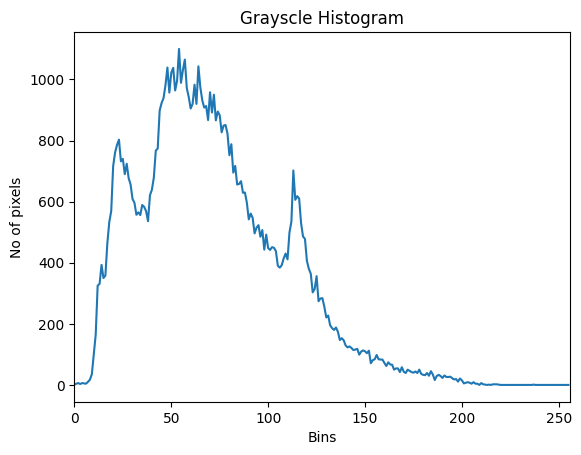

In [45]:
#histogram computation
#grayscale histogram
gray_hist = cv.calcHist([gray], [0], None, [256], [0, 256])
plt.figure()
plt.title("Grayscle Histogram")
plt.xlabel("Bins")
plt.ylabel("No of pixels")
plt.plot(gray_hist)
plt.xlim([0,256])
plt.show()

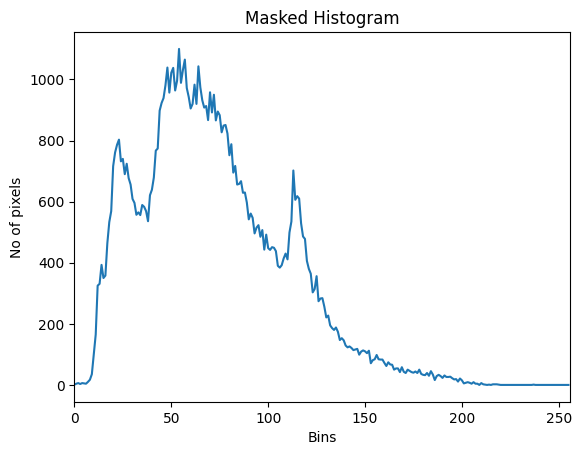

In [50]:
#masked histogram
gray_masked = cv.cvtColor(masked_img, cv.COLOR_BGR2GRAY)
masked_hist = cv.calcHist([masked_img], [0], mask, [256], [0, 256])
plt.figure()
plt.title("Masked Histogram")
plt.xlabel("Bins")
plt.ylabel("No of pixels")
plt.plot(gray_hist)
plt.xlim([0,256])
plt.show()

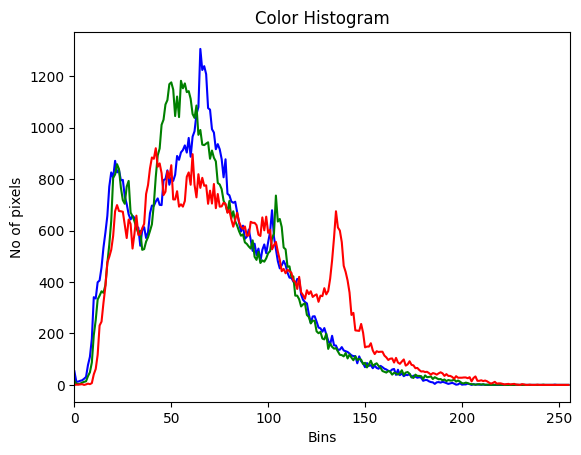

In [56]:
#color histogram
colors = ('b', 'g', 'r')
plt.title("Color Histogram")
plt.xlabel("Bins")
plt.ylabel("No of pixels")

for i, col in enumerate(colors):
    hist = cv.calcHist([img], [i], None, [256], [0,256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])
plt.show()

In [64]:
#thresholding and binarization
img3 = cv.imread("cat/cat.2.jpg")
cv.imshow("Cat", img3)

gray = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)
cv.imshow("Gray Cat", gray)

#simple thresholding
threshold, thresh = cv.threshold(gray, 150, 255, cv.THRESH_BINARY)
cv.imshow("Simple Thresholding", thresh)

#inverse thresholding
threshold, thresh_inv = cv.threshold(gray, 150, 255, cv.THRESH_BINARY_INV)
cv.imshow("Inverse Thresholding", thresh_inv)

#adaptive thresholding
adaptive_thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 3, 0)
cv.imshow("Adaptive Thresholding", adaptive_thresh)

cv.waitKey(10000)
cv.destroyAllWindows()

In [69]:
#gradients and edge detection
gray = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)
cv.imshow("Gray Cat", gray)

#laplacian edge detection
lap = cv.Laplacian(gray, cv.CV_64F)
lap = np.uint8(np.absolute(lap))
cv.imshow("Laplacian", lap)

#sobel edge detection
sobelx = cv.Sobel(gray, cv.CV_64F, 1, 0) #x direction
sobely = cv.Sobel(gray, cv.CV_64F, 0, 1) #y direction

#combine the cobel x and y
sobel_combined = cv.bitwise_or(sobelx, sobely)

cv.imshow("Sobel X", sobelx)
cv.imshow("Sobel Y", sobely)
cv.imshow("Sobel Combined", sobel_combined)

#canny edge detection
canny = cv.Canny(gray, 125, 175)
cv.imshow("Canny Edges", canny)

cv.waitKey(10000)
cv.destroyAllWindows()